In [ ]:
import os
import kagglehub

# Set KaggleHub cache directory to your desired path
os.environ["KAGGLEHUB_CACHE"] = "/content/Dataset"

# Download dataset
path = kagglehub.dataset_download("lylmsc/wider-face-for-yolo-training")

print("Path to dataset files:", path)


100%|██████████| 2.45G/2.45G [01:52<00:00, 23.3MB/s]

Extracting files...


Path to dataset files: /content/Dataset/datasets/lylmsc/wider-face-for-yolo-training/versions/1


In [ ]:
import shutil
shutil.move("/content/Dataset/datasets/lylmsc/wider-face-for-yolo-training/versions/1", "/content")
os.rename("/content/1", "/content/WiderFace")

In [ ]:
!rm -rf /content/Dataset/

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

os.makedirs("dataset" , exist_ok = True)
base_dir  = "dataset"
image_dir = "WiderFace/images"
label_dir = "WiderFace/labels"

In [ ]:
print(f" Length of images :{len(os.listdir(image_dir))}")
print(f" Length of labels :{len(os.listdir(label_dir))}")

 Length of images :12880
 Length of labels :12880


In [ ]:
# Collect image and label and sort them
images = sorted([files for files in os.listdir(image_dir) if files.endswith(".jpg")])
labels = sorted([files for files in os.listdir(label_dir) if files.endswith(".txt")])
if len(images) == len(labels):
    print("Length Match")
else:
    raise ValueError(f"Mismatch: {len(images)} images and {len(labels)} labels!")

Length Match


In [ ]:
print(f"Length of images :{len(images)}")
print(f"Length of labels :{len(labels)}")

Length of images :12880
Length of labels :12880


In [ ]:
train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

In [ ]:
def prepare_split(image_list , split):
  os.makedirs(f"{base_dir}/{split}/images", exist_ok=True)
  os.makedirs(f"{base_dir}/{split}/labels", exist_ok=True)


  for img in image_list:
    base = os.path.splitext(img)[0]
    shutil.copy(os.path.join(image_dir,img),f"{base_dir}/{split}/images/{img}")  #processing the images
    shutil.copy(os.path.join(label_dir,base+".txt"),f"{base_dir}/{split}/labels/{base}.txt") #processin the corresponding lables

prepare_split(train_images,"train")
prepare_split(val_images,"val")

print("Dataset has been split into train and validation sets.")


Dataset has been split into train and validation sets.


Setting up the yaml file

In [ ]:
yaml_content = """\
path: dataset
train: train/images
val: val/images

nc: 1
names: ['face']
"""

with open("dataset/data.yaml", "w") as f:
    f.write(yaml_content)

print("YOLO data config file created at dataset/data.yaml")

YOLO data config file created at dataset/data.yaml


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 749.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # You can use yolov8s.pt, yolov8m.pt, etc.

# STEP 5: Train the model
model.train(
    data="dataset/data.yaml",  # Path to the YAML file
    epochs=20,
    imgsz=640,
    batch=16
)

# You can do this anytime later
model = YOLO("runs/detect/train/weights/best.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 312MB/s]


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

100%|██████████| 755k/755k [00:00<00:00, 139MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 347MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 66.3±18.1 MB/s, size: 211.6 KB)


train: Scanning /content/dataset/train/labels... 10304 images, 3 backgrounds, 1 corrupt: 100%|██████████| 10304/10304 [00:27<00:00, 379.13it/s]

train: /content/dataset/train/images/wider_10969.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0254]
train: /content/dataset/train/images/wider_12381.jpg: 1 duplicate labels removed
train: /content/dataset/train/images/wider_3232.jpg: 1 duplicate labels removed
train: /content/dataset/train/images/wider_7207.jpg: 1 duplicate labels removed


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 33.9±23.1 MB/s, size: 164.6 KB)


val: Scanning /content/dataset/val/labels... 2576 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2576/2576 [00:07<00:00, 367.04it/s]

val: New cache created: /content/dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      11.9G        1.9      1.462      1.149       1619        640: 100%|██████████| 644/644 [03:59<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:33<00:00,  2.40it/s]


                   all       2576      32317      0.723       0.41      0.463      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      11.7G      1.733      1.072      1.084        133        640: 100%|██████████| 644/644 [03:45<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:29<00:00,  2.73it/s]


                   all       2576      32317       0.75      0.444      0.506      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      10.9G      1.724      1.038      1.074        792        640: 100%|██████████| 644/644 [03:45<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:29<00:00,  2.72it/s]


                   all       2576      32317      0.768       0.46      0.515      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      10.3G       1.67      0.989       1.06        967        640: 100%|██████████| 644/644 [03:44<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:29<00:00,  2.71it/s]


                   all       2576      32317      0.767      0.463      0.534       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      9.86G      1.644     0.9556      1.054        217        640: 100%|██████████| 644/644 [03:42<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:29<00:00,  2.79it/s]


                   all       2576      32317      0.783      0.467      0.544      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.34G      1.638     0.9305      1.047        114        640: 100%|██████████| 644/644 [03:44<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:30<00:00,  2.65it/s]


                   all       2576      32317      0.766       0.49      0.555      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      9.12G      1.603     0.9011      1.039        432        640: 100%|██████████| 644/644 [03:44<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:29<00:00,  2.75it/s]


                   all       2576      32317      0.797      0.483      0.552      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      12.9G      1.577     0.8791      1.031        204        640: 100%|██████████| 644/644 [03:43<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:29<00:00,  2.77it/s]


                   all       2576      32317      0.808      0.501      0.579      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      10.8G       1.56     0.8533      1.024        186        640: 100%|██████████| 644/644 [03:40<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:28<00:00,  2.84it/s]


                   all       2576      32317      0.813      0.511      0.594      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      9.23G      1.561     0.8497      1.022        125        640: 100%|██████████| 644/644 [03:41<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:28<00:00,  2.82it/s]


                   all       2576      32317       0.82      0.516      0.597      0.315
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      13.4G      1.528     0.8219      1.027        168        640: 100%|██████████| 644/644 [03:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:28<00:00,  2.82it/s]


                   all       2576      32317      0.814      0.499      0.571      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      9.29G      1.514     0.8042      1.027        140        640: 100%|██████████| 644/644 [03:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:28<00:00,  2.87it/s]


                   all       2576      32317      0.816      0.514      0.595      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20        12G      1.504     0.7841      1.018        716        640: 100%|██████████| 644/644 [03:27<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:28<00:00,  2.87it/s]


                   all       2576      32317      0.822      0.522      0.604      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      14.5G      1.491     0.7738      1.016        110        640: 100%|██████████| 644/644 [03:29<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:28<00:00,  2.82it/s]


                   all       2576      32317      0.812      0.521      0.599      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.88G      1.482     0.7615      1.013        154        640: 100%|██████████| 644/644 [03:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:29<00:00,  2.71it/s]


                   all       2576      32317      0.827       0.52      0.599      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20        12G      1.469     0.7483      1.006        150        640: 100%|██████████| 644/644 [03:31<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:28<00:00,  2.83it/s]


                   all       2576      32317       0.83      0.527      0.611      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       9.7G      1.459     0.7399      1.007        252        640: 100%|██████████| 644/644 [03:30<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:28<00:00,  2.84it/s]


                   all       2576      32317      0.821      0.527      0.605      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      8.66G      1.445     0.7205     0.9996        150        640: 100%|██████████| 644/644 [03:33<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:29<00:00,  2.72it/s]


                   all       2576      32317      0.834      0.534      0.619      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      12.6G      1.433     0.7094     0.9968        167        640: 100%|██████████| 644/644 [03:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:29<00:00,  2.78it/s]


                   all       2576      32317       0.83      0.536       0.62      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      10.2G       1.42     0.6994     0.9939         77        640: 100%|██████████| 644/644 [03:31<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:28<00:00,  2.80it/s]


                   all       2576      32317      0.827       0.54      0.619      0.334

20 epochs completed in 1.385 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 81/81 [00:31<00:00,  2.55it/s]


                   all       2576      32317      0.834      0.534      0.619      0.338
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/train


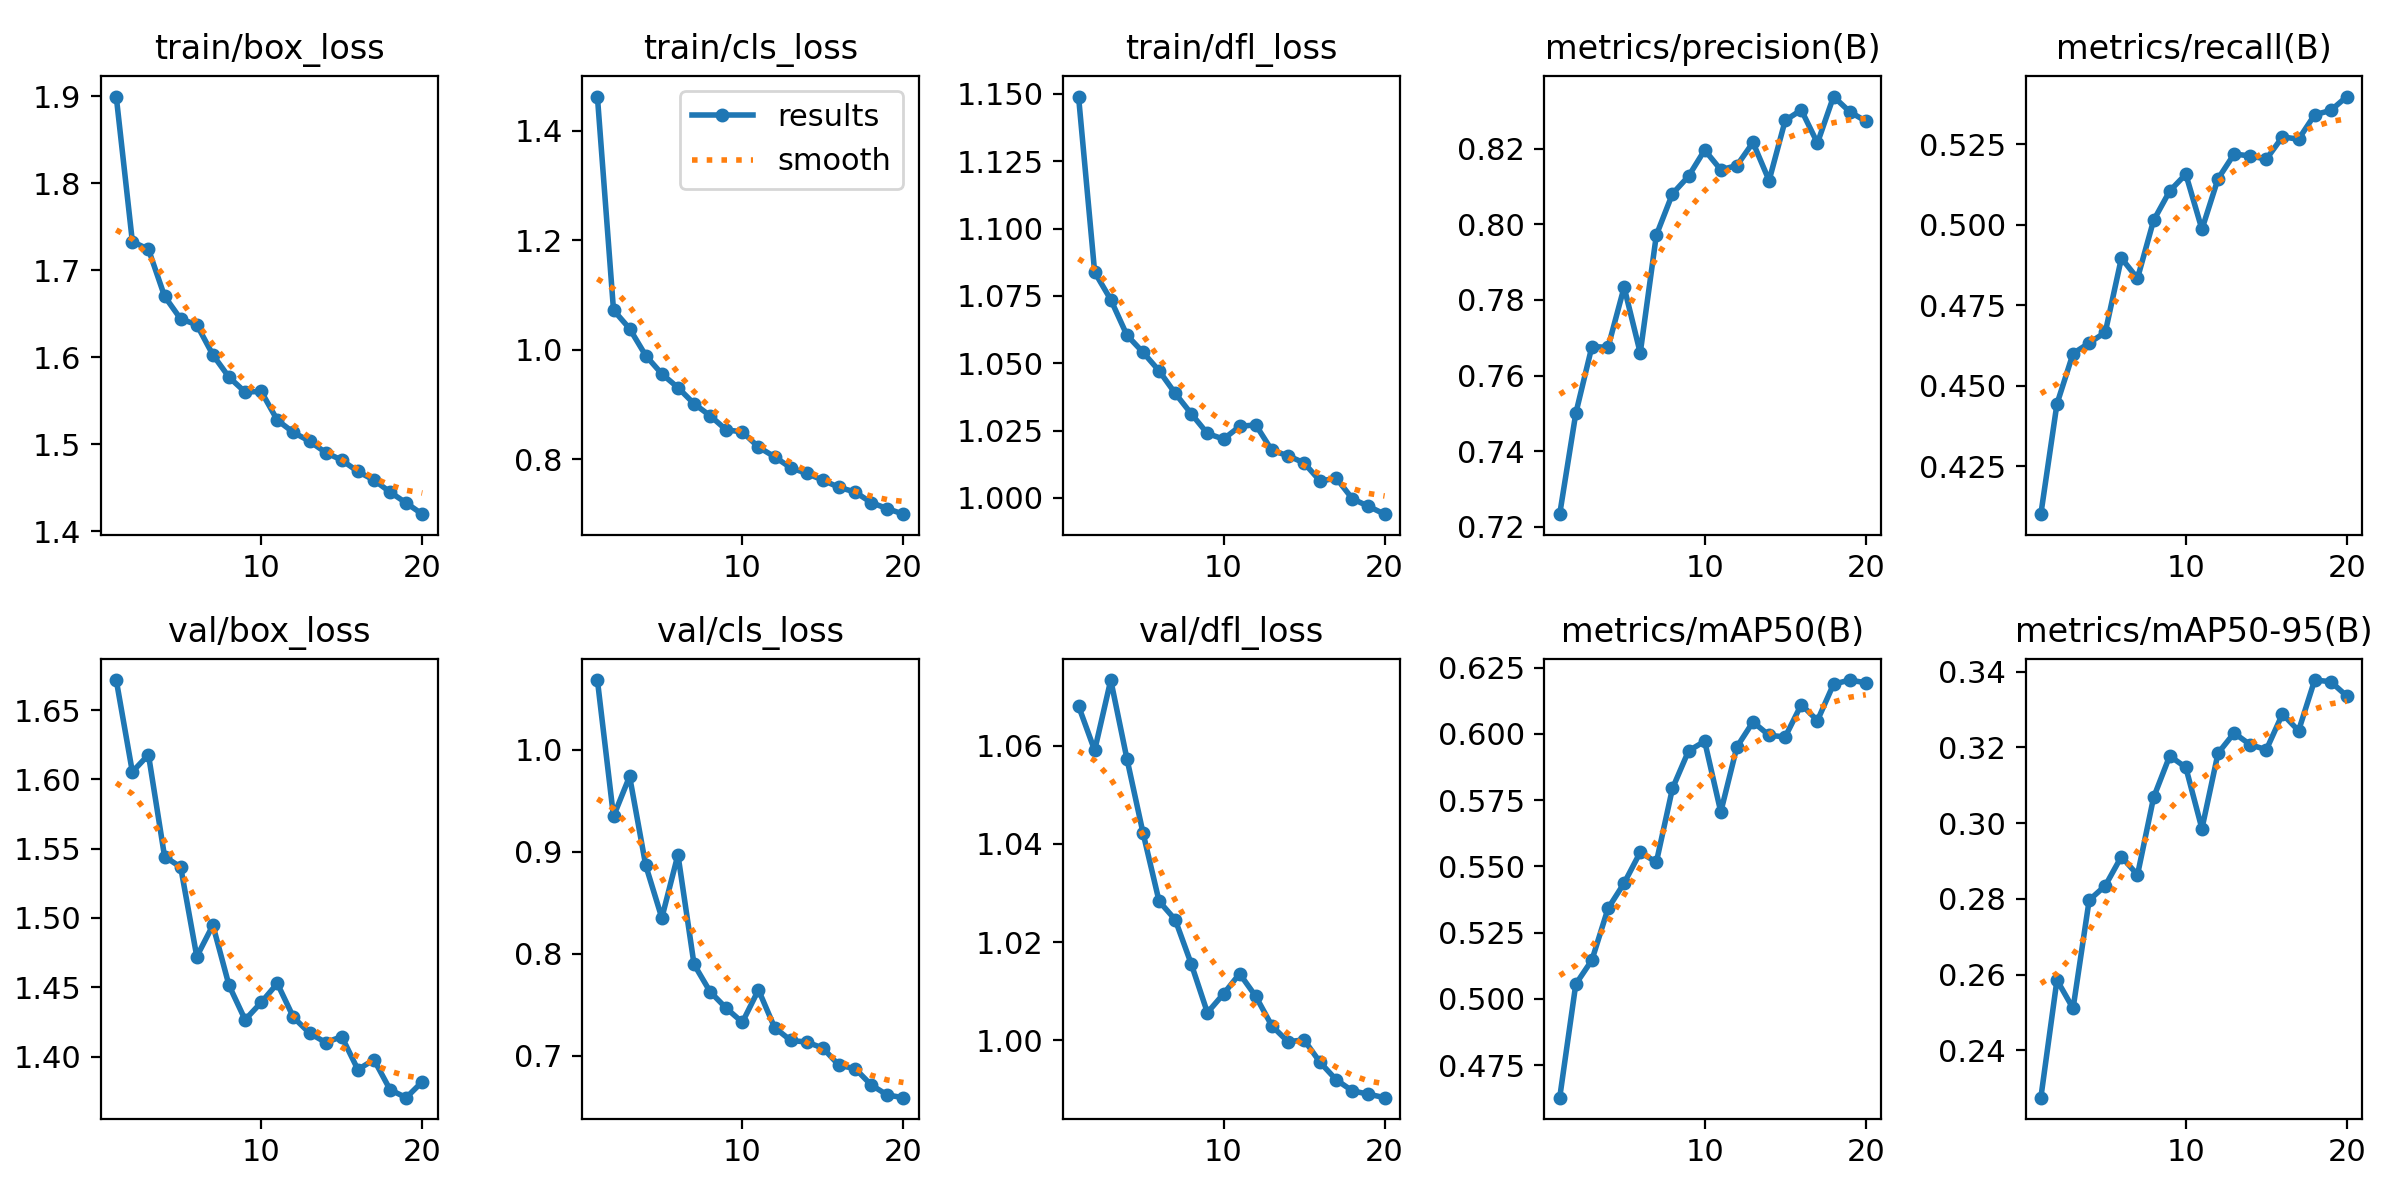

In [ ]:
from IPython.display import Image, display
display(Image(filename="runs/detect/train/results.png"))

Running inference on the images.

In [ ]:
results = model.predict(source="dataset/val/images", save=True, imgsz=640)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2576 /content/dataset/val/images/wider_0.jpg: 640x480 1 face, 36.6ms
image 2/2576 /content/dataset/val/images/wider_100.jpg: 480x640 2 faces, 41.1ms
image 3/2576 /content/dataset/val/images/wider_10003.jpg: 640x480 1 face, 7.3ms
image 4/2576 /content/dataset/val/images/wider_10009.jpg: 640x640 1 face, 8.0ms
image 5/2576 /content/dataset/val/images/wider_10011.jpg: 448x640 4 faces, 36.8ms
image 6/2576 /content/dataset/val/images/wider_10013.jpg:

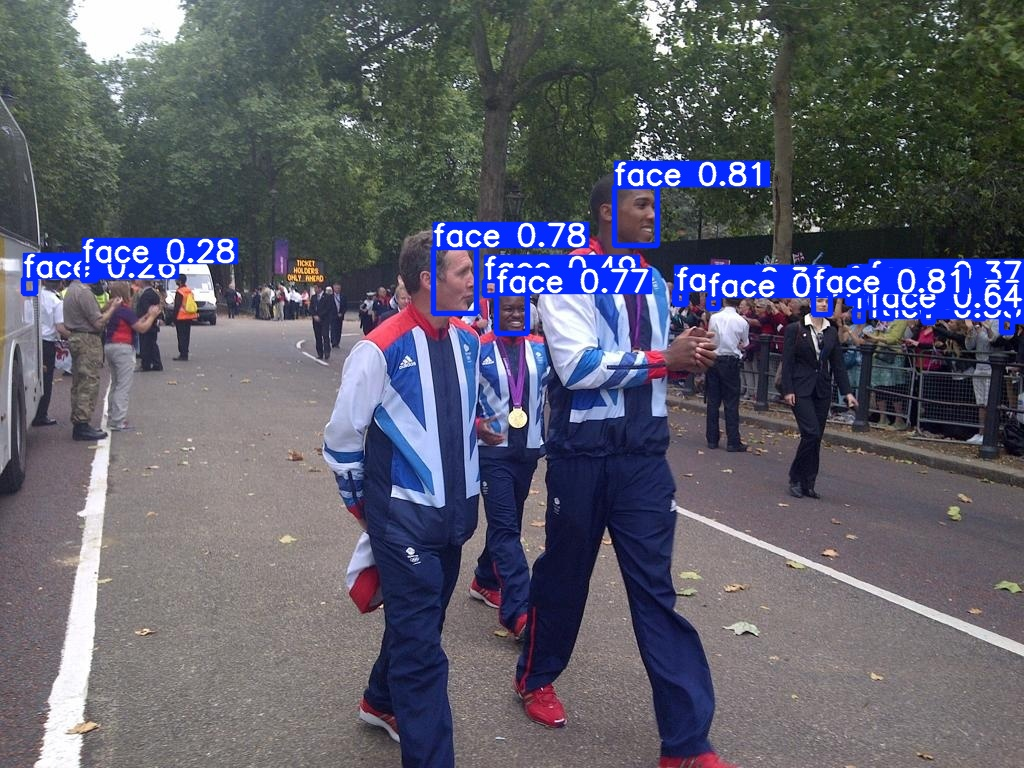

In [ ]:
from IPython.display import Image, display
display(Image(filename='runs/detect/predict/wider_261.jpg'))  # or any image in the folder